In [2]:
# Estudo paradas tratadas
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely.geometry import box, Point, Polygon, MultiPolygon
from shapely.wkt import loads
import folium as fl
import pandas as pd

In [73]:
dt = pd.read_csv("../Lucas/linhas_e_paradas_ordenadas_sentido.csv", converters={'Paradas': pd.eval})
#linhas = pd.read_csv('../../../databases/linhas/Linhas.csv')

In [74]:
dt

,Linha_Sentido,Paradas
0,0.018_IDA,"[[201525.5071962654, 8255354.906054546], [2011..."
1,0.018_VOLTA,"[[188739.5290032365, 8258122.98075948], [18928..."
2,100.2_VOLTA,"[[191225.63215564645, 8251734.843398984], [191..."
3,0.946_IDA,"[[173993.94907628946, 8251128.839942831], [174..."
4,0.373_IDA,"[[162532.11422302714, 8241107.6575780185], [16..."
...,...,...
1303,372.5_CIRCULAR,"[[162532.11422302714, 8241107.6575780185], [16..."
1304,506.2_VOLTA,"[[184487.0093377559, 8276002.737781343], [1848..."
1305,506.2_IDA,"[[201130.76538079558, 8267829.663434813], [200..."
1306,0.05_CIRCULAR,"[[162532.11422302714, 8241107.6575780185], [16..."


In [92]:
# Copiei as seguintes linhas lá no notebook do Lucas, pq né, funciona :p
import ast

df_linhas_e_paradas = pd.read_csv('../Lucas/linhas_e_paradas_ordenadas_sentido.csv')

# Filtrar as paradas da linha 813.2 no sentido de "IDA"
linha_813_2_ida = df_linhas_e_paradas[df_linhas_e_paradas['Linha_Sentido'] == '0.205_VOLTA']['Paradas'].iloc[0]

# Convertendo a string para uma lista de tuplas
linha_813_2_ida = ast.literal_eval(linha_813_2_ida)

# Trasnformando as tuplas para o formato correto

In [93]:
# Trasnformando as tuplas para o formato correto

import pyproj

# Defina o sistema de coordenadas de origem (EPSG:31983) e destino (EPSG:4326)
crs_origem = pyproj.CRS.from_epsg(31983)
crs_destino = pyproj.CRS.from_epsg(4326)

# Crie um objeto Transformer
transformer = pyproj.Transformer.from_crs(crs_origem, crs_destino, always_xy=True)


# Transforme as coordenadas para o sistema de destino
coordenadas_destino = [transformer.transform(x, y) for x, y in linha_813_2_ida]

print(coordenadas_destino)


[(-48.11048809206648, -15.794908525653646), (-48.10864980299485, -15.795881568143445), (-48.1065692814234, -15.797254840461907), (-48.103961280215046, -15.799037151946361), (-48.10153147572873, -15.800665910297404), (-48.0988566012951, -15.80246880295533), (-48.096781, -15.803768000000003), (-48.096759526899376, -15.803838519068647), (-48.09413574965139, -15.80563767653442), (-48.09128755584452, -15.808179088513917), (-48.08748023679375, -15.809566546991512), (-48.08497729495356, -15.808773820309833), (-48.081008558469144, -15.807487973972426), (-48.07802199665336, -15.806522564161366), (-48.076700299186285, -15.806072984240457), (-48.07545422759447, -15.805698733558776), (-48.07240836245379, -15.804716177157719), (-48.06907525320274, -15.80364663183229), (-48.066895279538976, -15.805358273797404), (-48.06607557055268, -15.807774879509472), (-48.06476815257983, -15.811590094649755), (-48.06411786114024, -15.81347204622781), (-48.06283598079282, -15.817260541952304), (-48.06054285595057

In [5]:
# Faz o teste para ver se tem uma linha no seu dataframe
if '0.205' in [str(dado) for dado in list(dt.linha.unique())]:
    print('Tem')
else:
    print('Não tem')

Tem


In [47]:
# Fazendo o plot do 813
dt_205 = dt[dt['linha']==0.205]

In [48]:
dt_205.parada

186    [[-16.003489982135445, -48.053122011503056, 19...
Name: parada, dtype: object

In [97]:
coordenadas_destino

[(-48.11048809206648, -15.794908525653646),
 (-48.10864980299485, -15.795881568143445),
 (-48.1065692814234, -15.797254840461907),
 (-48.103961280215046, -15.799037151946361),
 (-48.10153147572873, -15.800665910297404),
 (-48.0988566012951, -15.80246880295533),
 (-48.096781, -15.803768000000003),
 (-48.096759526899376, -15.803838519068647),
 (-48.09413574965139, -15.80563767653442),
 (-48.09128755584452, -15.808179088513917),
 (-48.08748023679375, -15.809566546991512),
 (-48.08497729495356, -15.808773820309833),
 (-48.081008558469144, -15.807487973972426),
 (-48.07802199665336, -15.806522564161366),
 (-48.076700299186285, -15.806072984240457),
 (-48.07545422759447, -15.805698733558776),
 (-48.07240836245379, -15.804716177157719),
 (-48.06907525320274, -15.80364663183229),
 (-48.066895279538976, -15.805358273797404),
 (-48.06607557055268, -15.807774879509472),
 (-48.06476815257983, -15.811590094649755),
 (-48.06411786114024, -15.81347204622781),
 (-48.06283598079282, -15.817260541952304

In [94]:
# Salvando a rota em um array de tuplas
from pyproj import Transformer
#transformer = Transformer.from_crs("EPSG:31983", "EPSG:4326", always_xy=True)
contador = 0
m = fl.Map(location=[-15.76050, -47.78134], zoom_start=10)
for ponto in coordenadas_destino:
    #transformed_coords = transformer.transform(lat, long)
    fl.Circle([ponto[1], ponto[0]], fill_color='#000000', radius=15).add_to(m)
m  

### Preparação para filtragem de paradas que não fazem parte de uma rota. 

O projeto consiste em calcular a média das distâncias entre as paradas e em seguida colocar um limiar abaixo para que as paradas muito próximas uma das outras sejam eliminadas.

$$ média\ das\ distâncias = \sum_{i=0}^{n} \frac{distâncias_{i}}{n-1}$$

$n: número\ de\ paradas$

As etapas de dessa filtragem são:

**Passo 1: Preparação dos Dados**

- Deixar o dataframe das paradas em ordem ao longo da rota e indexadas.
- Calular as distâncias entre paradas consecutivas.

**Passo 2: Definição de Limiares**

- Calcular a média das distâncias entre as paradas.
- Calcular o desvio padrão das distâncias entre as paradas.
- Definir um limiar que seja uma combinação da média e do desvio padrão, por exemplo, `limiar = média + k * desvio_padrao`, onde `k` é um fator que você pode ajustar com base na sensibilidade desejada.

**Passo 3: Identificação e Eliminação de Paradas Próximas**

- Iniciar um loop para percorrer todas as paradas da rota, começando pela primeira.
- Para cada parada atual, calcular a distância até a próxima parada.
- Se a distância for menor que o limiar definido no Passo 2, eliminar a próxima parada (atualize os dados originais para remover essa parada).
- Reordenar a lista de paradas, se necessário, após a eliminação.
- Voltar ao passo 3º caso não tenha chegado até a ultima parada.

**Passo 4: Repetição e Verificação**

- Repetir o Passo 3 até que não seja mais possível eliminar paradas (ou seja, a distância entre todas as paradas seja maior que o limiar).
- Isso garantirá que todas as paradas próximas demais sejam removidas.
- Verificar no gráfico se a qualidade da representação da rota melhorou visualizando os resultados no gráfico.


In [ ]:
# Organizando o dataframe para colocar paradas em ordem

In [50]:
from shapely.geometry import Point
import geopandas as gpd

# Etapa 1: Calcular a distância entre dois pontos da linestring de forma simples
p1 = Point(ponto[0][0], ponto[0][1])
p2 = Point(ponto[1][0], ponto[1][1])

# Verifica se os pontos estão corretos
print("O ponto 1 eh:", p1)
print("O ponto 2 eh:", p2)

O ponto 1 eh: POINT (-16.003489982135445 -48.053122011503056)
O ponto 2 eh: POINT (-15.998391002544192 -48.05290170811915)


In [51]:
# Criar um GeoDataFrame com os pontos
data = {'Name': ['Point 1', 'Point 2'], 'geometry': [p1, p2]}
gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')
gdf


,Name,geometry
0,Point 1,POINT (-16.00349 -48.05312)
1,Point 2,POINT (-15.99839 -48.05290)


In [52]:
# Calcular a distância entre os dois pontos
distance = gdf.geometry.iloc[0].distance(gdf.geometry.iloc[1])

print("Distância entre os pontos:", distance)
print(type(distance))
len(ponto)

Distância entre os pontos: 0.005103736518764752
<class 'float'>


143

In [53]:
# Genralizando para apenas um única linha
# Função para cálculo de distâncias entre dois pontos


In [107]:
from geopy.distance import geodesic

# Algoritmo para calcular as distâncias
distances = []

def calcDistance(p1, p2) -> float:
    dist = geodesic(p1,p2).kilometers
    print(p1, p2)
    print(dist)
    return dist

# Salva as distancias iterando sobre as coordenadas
for i in range(len(coordenadas_destino) - 1):
    p0 = coordenadas_destino[i] #
    pi = coordenadas_destino[i+1] #
    d = calcDistance(tuple((p0[1],p0[0])), tuple((pi[1],pi[0])))
    distances.append(d)
len(distances)



(-15.794908525653646, -48.11048809206648) (-15.795881568143445, -48.10864980299485)
0.2244693605406221
(-15.795881568143445, -48.10864980299485) (-15.797254840461907, -48.1065692814234)
0.26978098157913566
(-15.797254840461907, -48.1065692814234) (-15.799037151946361, -48.103961280215046)
0.3420167973119841
(-15.799037151946361, -48.103961280215046) (-15.800665910297404, -48.10153147572873)
0.31663163078477147
(-15.800665910297404, -48.10153147572873) (-15.80246880295533, -48.0988566012951)
0.3491871927860401
(-15.80246880295533, -48.0988566012951) (-15.803768000000003, -48.096781)
0.2648014961388581
(-15.803768000000003, -48.096781) (-15.803838519068647, -48.096759526899376)
0.008135469252859477
(-15.803838519068647, -48.096759526899376) (-15.80563767653442, -48.09413574965139)
0.3444657564367351
(-15.80563767653442, -48.09413574965139) (-15.808179088513917, -48.09128755584452)
0.41497110677700927
(-15.808179088513917, -48.09128755584452) (-15.809566546991512, -48.08748023679375)
0.43

83

In [108]:
distances

[0.2244693605406221,
 0.26978098157913566,
 0.3420167973119841,
 0.31663163078477147,
 0.3491871927860401,
 0.2648014961388581,
 0.008135469252859477,
 0.3444657564367351,
 0.41497110677700927,
 0.43583678405934506,
 0.2821369630253961,
 0.4483702907971165,
 0.3373324103580419,
 0.15008748130059835,
 0.1397764347450355,
 0.3439626155476262,
 0.3762042061859953,
 0.3007046711375782,
 0.28146505100518704,
 0.4448090063627499,
 0.2195950548949671,
 0.44114334486859835,
 0.7754167540215522,
 0.38286112372090303,
 0.2903093142283902,
 0.23902517977813095,
 0.26294713132034014,
 0.17031158214662917,
 0.985875938419882,
 0.40031426170332146,
 0.40936748094484315,
 0.4910016014258371,
 0.3079085739976498,
 0.6214750102700382,
 0.5478787057632211,
 0.27901543478732255,
 0.0,
 0.0020404065191971317,
 0.4207666770043204,
 0.2599686680164173,
 4.224958043141759,
 1.7421771302955353,
 0.004032845349261019,
 0.44161649777068973,
 0.0015371883162276902,
 0.3315081523778547,
 0.0,
 0.00127286312273914

In [109]:
# normalizando e trucando
distances2 = []
for val in distances:
    if val >= 1:
        distances2.append(1)
    else:
        distances2.append(float(f'{val:.1f}'))

In [110]:
# Inicialize um dicionário para manter a contagem
contagem = {}

# Percorra a lista e conte as ocorrências de cada valor
for valor in distances2:
    if valor in contagem:
        contagem[valor] += 1
    else:
        contagem[valor] = 1

# Exiba a contagem de ocorrências
for valor, quantidade in contagem.items():
    print(f"{valor}: {quantidade}")


0.2: 7
0.3: 28
0.0: 9
0.4: 16
0.1: 2
0.8: 3
1.0: 7
0.5: 5
0.6: 4
0.7: 2


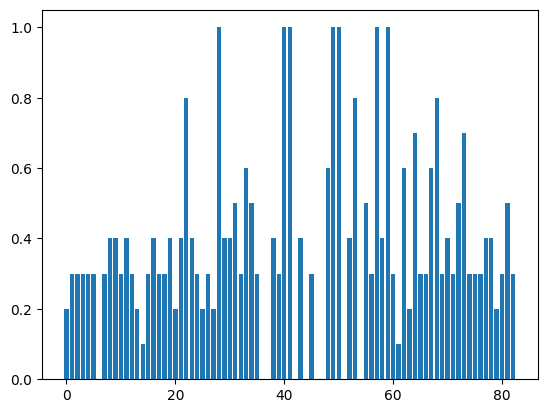

In [111]:
#Plotando as distâncias
import matplotlib.pyplot as plt
import numpy as np

plt.bar(range(len(distances2)), distances2)
plt.show()


In [18]:
type(distances)

list

In [ ]:
# Transforma nossa lista em um array de distâncias
linhas = np.array(distances)

In [ ]:
# Obtem as médias das distâncias
linhas.mean()

0.033750798225408815

In [ ]:
# remove